###  导入相关包

In [27]:
import numpy as np
import pandas as pd 
from sklearn import tree,svm,datasets,preprocessing,model_selection
# cross_validation里面的函数现在在model_selection里面
from sklearn.metrics import roc_curve, auc  
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
from sklearn.model_selection import learning_curve
from sklearn.model_selection import StratifiedShuffleSplit
import pydotplus
from IPython.display import Image,display

### 数据导入，查看、处理

In [28]:
iris = load_iris()
# 字典形式
print(dir(iris)) 
# print(iris.data)
print(iris.data.shape)
print(iris.target_names)
# print(iris.DESCR)
print(iris.feature_names)
print(iris.target)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']
(150, 4)
['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### Draw ROC Curve

<Figure size 432x288 with 0 Axes>

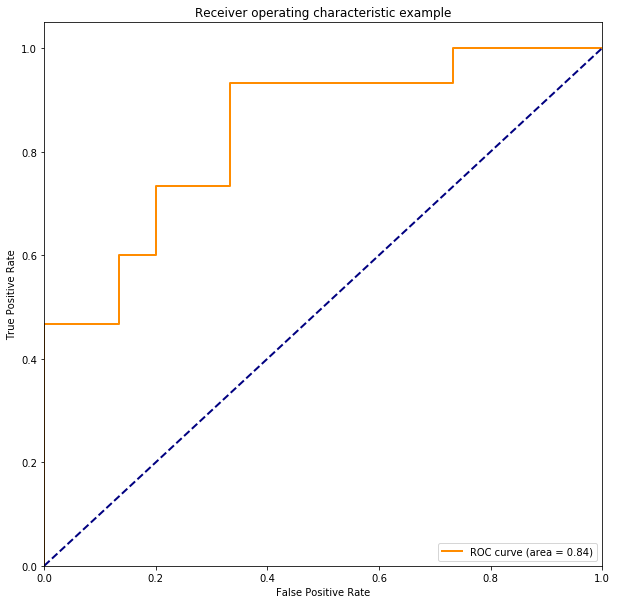

In [29]:
# Import some data to play with
iris = datasets.load_iris()
data = iris.data
target = iris.target 
#变为2分类  将数据转化为二分类，这样比较容易理解
two_data, two_target = data[target != 2], target[target != 2]
# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)

#Returns the number of rows and columns
n_samples, n_features = two_data.shape  

# Join the two matrices by row, add the two matrices left and right;
# 随机生成100行，800列的数组（正态分布的数）-->X:100*804
# randn：从标准正态分布中返回一个或多个样本值。 
X = np.c_[two_data, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, two_target, test_size=.3,random_state=0)

# Learn to predict each class against the other
# 按照random_state的种子洗牌，依概率估计
svm = svm.SVC(kernel='rbf', probability=True,random_state=random_state)

# 通过decision_function()计算得到的y_score的值，用在roc_curve()函数中
y_score = svm.fit(X_train, y_train).decision_function(X_test)
# print(y_score)
# print(svm.fit(X_train,y_train))
# Compute ROC curve and ROC area for each class
fpr,tpr,threshold = roc_curve(y_test, y_score) ###计算真正率和假正率
roc_auc = auc(fpr,tpr) ###计算auc的值
# print(roc_auc)
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show() 

### Draw Learning Curve

scores:[0.97142857 0.94285714 1.        ],scores mean:0.9714285714285714 +/- 0.02332847374079218


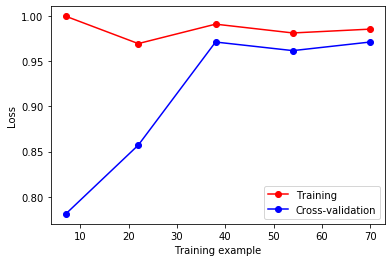

0.9333333333333333


In [38]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve

# 一个比较理想的学习曲线图应当是：低偏差、低方差，即收敛且误差小。
data = iris.data
target = iris.target

# 分为一组train/test组；train：test = 7：3
#对样本进行分层采样
split = StratifiedShuffleSplit(n_splits=1,test_size=0.3,random_state
                              =42)

#划分出了训练集和测试集：
for train_index, test_index in split.split(data, target):
   x_train, y_train = data[train_index], target[train_index]#训练集对应的值
   x_test, y_test = data[test_index], target[test_index]#类别集对应的值
    
# 设置参数C和gamme的值进行SVM训练,已调整当C=5，gamma=0.1时，准确率达到最大
# 用svm来分类数据集
# 使用pipeline简化系统搭建流程
svm_pip = Pipeline(
    [
        ('scaler',StandardScaler()),#特征标准化
        ('svm',SVC(C=5,gamma=0.1,kernel='rbf'))
    ])
scores = cross_val_score(svm_pip,x_train,y_train,cv=3,scoring='accuracy')
print('scores:{},scores mean:{} +/- {}'.format(scores,np.mean(scores),
                                           np.std(scores)))
 
train_sizes, train_scores,test_scores = learning_curve(
    svm_pip,x_train,y_train,cv=3,n_jobs=-1,
    train_sizes=np.linspace(.1,1.0,5),scoring='accuracy')

train_scores_mean=np.mean(train_scores,axis=1)
train_scores_std = np.std(train_scores,axis=1)
test_scores_mean = np.mean(test_scores,axis=1)
test_score_std = np.std(test_scores,axis=1)

plt.plot(train_sizes,train_scores_mean,'o-',color='r',
         label='Training')
plt.plot(train_sizes,test_scores_mean,'o-',color='b',
          label='Cross-validation')
plt.xlabel('Training example')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

#svm模型关于测试集上的性能
svm_pip.fit(x_train,y_train)

y_pred=svm_pip.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

### Draw validation Curve

[[0.925      0.91666667 0.93333333 0.925      0.9       ]
 [0.95833333 0.93333333 0.96666667 0.95       0.91666667]
 [1.         1.         1.         1.         1.        ]]
[[0.86666667 0.96666667 0.83333333 0.96666667 0.93333333]
 [0.9        0.96666667 0.86666667 0.93333333 1.        ]
 [0.46666667 0.4        0.33333333 0.4        0.4       ]]


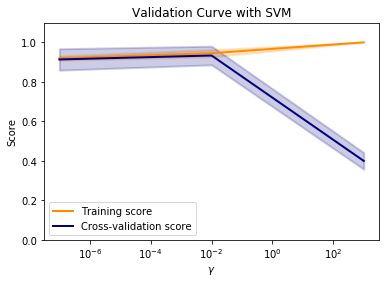

In [31]:
from sklearn.model_selection import validation_curve
iris = datasets.load_iris()
data = iris.data
target = iris.target

param_range = np.logspace(-7, 3, 3)
train_scores, test_scores = validation_curve(
    SVC(),
    data, target,
    param_name="gamma",
    param_range=param_range,
    scoring="accuracy", n_jobs=1)
print(train_scores)
print(test_scores)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SVM")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")

plt.show()



###  kFold Cross-validation

In [32]:
from sklearn.model_selection import KFold
from lightgbm import LGBMClassifier
iris = datasets.load_iris()
data = iris.data
target = iris.target

#设置n_splits=5
kf =KFold(n_splits=5, shuffle=True)
max_depths=range(1,11) 
result=[]
dit = {}
for max_depth in max_depths:
    for k,(train,test) in enumerate(kf.split(data,target)):
        test_score=[]
        data_train,data_test,target_train,target_test=data[train],data[test],target[train],target[test]
        clg = LGBMClassifier(
            objective="multiclass",
            boosting="gbdt",
            learning_rate=0.1,
            max_depth=max_depth,
            n_estimators=100,
            num_leaves=31,
            lambda_l1=0.1,    
            lambda_l2=0.1,    
            seed=0
        )
        clg.fit( data_train,target_train,eval_set=[( data_test, target_test)],verbose=-1)
        print("第%s轮验证："%(k+1))
        print("本轮训练集得分：%.2f%%"%(clg.score(data_train,target_train)*100))
        print("本轮测试集得分：%.2f%%"%(clg.score(data_test,target_test)*100))
        test_score.append(clg.score(data_test,target_test))
    result.append(np.mean(test_score))
    dit[np.mean(test_score)] = max_depth
    print("max_depth:",max_depth,"mean_score:",np.mean(test_score))
    print("*"*50)
print('bets mean recall score:',max(result),"depth:",dit[max(result)]) 

第1轮验证：
本轮训练集得分：96.67%
本轮测试集得分：100.00%
第2轮验证：
本轮训练集得分：98.33%
本轮测试集得分：93.33%
第3轮验证：
本轮训练集得分：97.50%
本轮测试集得分：96.67%
第4轮验证：
本轮训练集得分：97.50%
本轮测试集得分：96.67%
第5轮验证：
本轮训练集得分：98.33%
本轮测试集得分：93.33%
max_depth: 1 mean_score: 0.9333333333333333
**************************************************
第1轮验证：
本轮训练集得分：100.00%
本轮测试集得分：93.33%
第2轮验证：
本轮训练集得分：98.33%
本轮测试集得分：93.33%
第3轮验证：
本轮训练集得分：100.00%
本轮测试集得分：93.33%
第4轮验证：
本轮训练集得分：97.50%
本轮测试集得分：100.00%
第5轮验证：
本轮训练集得分：100.00%
本轮测试集得分：93.33%
max_depth: 2 mean_score: 0.9333333333333333
**************************************************
第1轮验证：
本轮训练集得分：100.00%
本轮测试集得分：96.67%
第2轮验证：
本轮训练集得分：98.33%
本轮测试集得分：96.67%
第3轮验证：
本轮训练集得分：99.17%
本轮测试集得分：100.00%
第4轮验证：
本轮训练集得分：100.00%
本轮测试集得分：93.33%
第5轮验证：
本轮训练集得分：99.17%
本轮测试集得分：93.33%
max_depth: 3 mean_score: 0.9333333333333333
**************************************************
第1轮验证：
本轮训练集得分：98.33%
本轮测试集得分：96.67%
第2轮验证：
本轮训练集得分：100.00%
本轮测试集得分：90.00%
第3轮验证：
本轮训练集得分：98.33%
本轮测试集得分：100.00%
第4轮验证：
本轮训练集得分：100.00%
本轮测试集得分：90.00%
第

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
 
# def BBB():  
    # 获取数据集
iris = datasets.load_iris()
data = iris.data
target = iris.target
# 划分数据集
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=1/3, random_state=10)
    
    #设置不同的模型对数据进行预测：
AAA = np.linspace(1e-2,1e2,num = 10)
print(AAA)
model_dict = {
'kNN':(KNeighborsClassifier(),{'n_neighbors': [5, 15, 25], 'p': [1, 2]}),
'Logistic Regression':(LogisticRegression(),{'C':AAA}),  #[1e-2, 1, 1e2]
'SVM':(SVC(),{'C':AAA})
        }   

for model_name, (model, model_params) in model_dict.items():
    # 训练模型
    # 使用网格索索，可以固定一个参数后对其他参数进行变化选择
    clf = GridSearchCV(estimator=model, param_grid=model_params, cv=5) #模型、参数、折数
    clf.fit(data_train, target_train)   #训练
    best_model = clf.best_estimator_   #最佳模型的对象
     # 验证
    acc = best_model.score(data_test, target_test)
    print('{}模型的预测准确率：{:.2f}%'.format(model_name, acc * 100))
    print('{}模型的最优参数：{}'.format(model_name, clf.best_params_))       #最好的模型名称和参数
    
    

[1.000e-02 1.112e+01 2.223e+01 3.334e+01 4.445e+01 5.556e+01 6.667e+01
 7.778e+01 8.889e+01 1.000e+02]
kNN模型的预测准确率：100.00%
kNN模型的最优参数：{'n_neighbors': 15, 'p': 1}


D:\anaconda\envs\Zhangrong\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\anaconda\envs\Zhangrong\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic

D:\anaconda\envs\Zhangrong\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\anaconda\envs\Zhangrong\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic

D:\anaconda\envs\Zhangrong\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\anaconda\envs\Zhangrong\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic

Logistic Regression模型的预测准确率：98.00%
Logistic Regression模型的最优参数：{'C': 11.12}
SVM模型的预测准确率：98.00%
SVM模型的最优参数：{'C': 11.12}


D:\anaconda\envs\Zhangrong\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\anaconda\envs\Zhangrong\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic

### DecisionTree

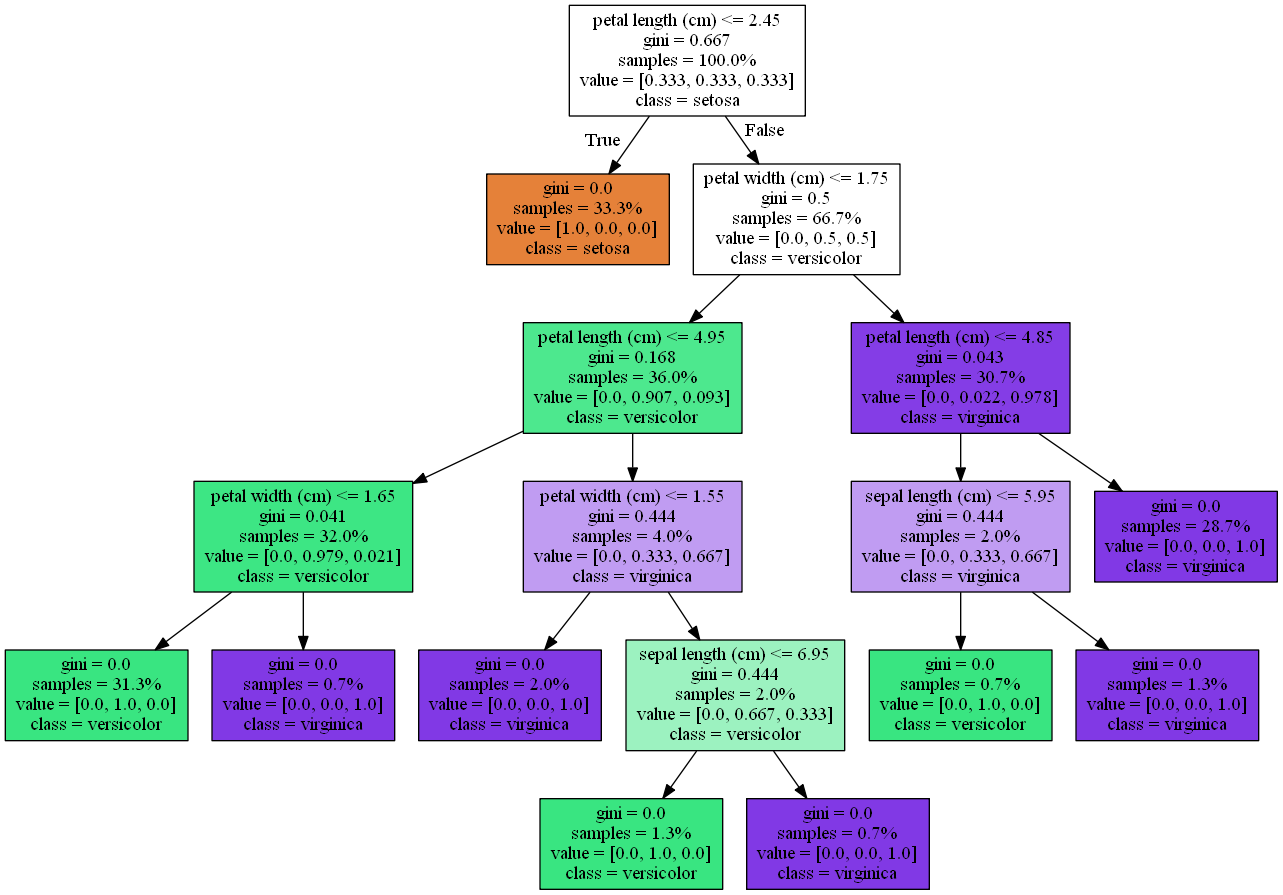

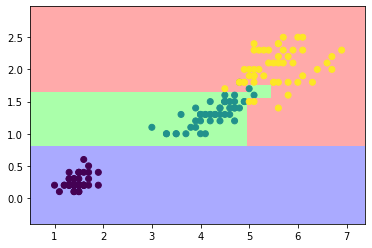

In [33]:
clf = tree.DecisionTreeClassifier(max_depth=6)  #设置最大树深为 6
clf = clf.fit(iris.data,iris.target)
dot_data = tree.export_graphviz(clf,
                               out_file=None,
                               feature_names=iris.feature_names,
                               class_names=iris.target_names,
                               filled=True,
#                                leaves_parallel=True,
                               proportion=True
                               )
graph = pydotplus.graph_from_dot_data(dot_data)
display(Image(graph.create_png()))

iris = datasets.load_iris()
x = iris.data[:,2:4]   #取出花瓣的长和宽（因为两者相关性最强）
# target = iris.target        #取出标签：0、0、0、0、0、1、1、1、1、1、1、1、2、2、2、2、2、……

# 计算散点图t的标签上下界
x_min,x_max=x[:,0].min()-.5,x[:,0].max()+.5
target_min,target_max=x[:,1].min()-.5,x[:,1].max()+.5

#绘制边界
cmap_light=ListedColormap(['#AAAAFF','#AAFFAA','#FFAAAA'])
h = .02
xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(target_min,target_max,h))

clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(x,target) #开始训练
z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
z = z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx,yy,z,cmap=cmap_light)
plt.scatter(x[:,0],x[:,1],c=target)
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.show()